## Descripcion de Problema

2. Busque en una sola página web con el personaje: seleccione una pagina (YOUTUBE o  GITHUB) y extraiga información relevante.  Registre esa información en una BD o un archivo csv. NOTA: puede usar bd grafo
    Youtube: nombre video, autor, readme, idioma, duración, fecha,  no. likes, no. dislike, numero de visitas.
    
## Diagrama UML

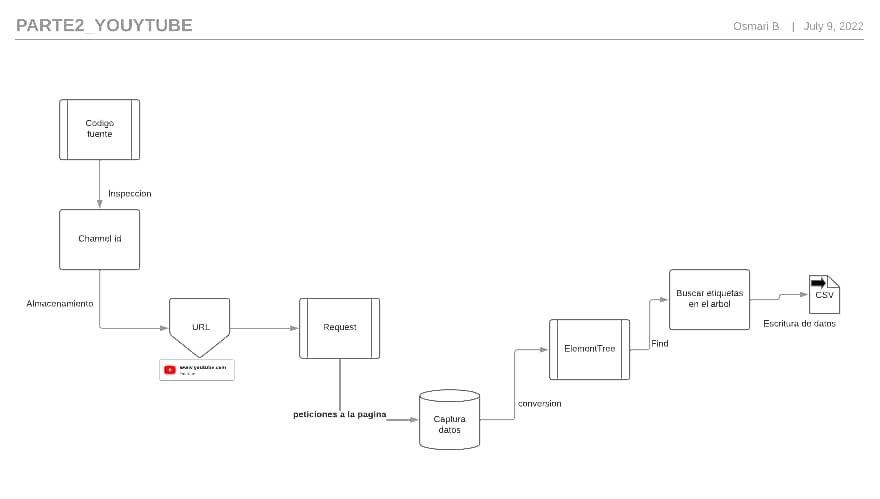

## Implementacion del Codigo

In [1]:
from cgi import print_arguments
import requests
import xml.etree.ElementTree as ET
import csv

url_video = 'https://www.youtube.com/feeds/videos.xml?channel_id=UCsT0YIqwnpJCM-mx7-gSA4Q'

r = requests.get(url_video, headers={"user-Agent":"Chrome/102.0.0.0"})
#los datos recuperados se convierten en contenido
data = r.content
#convierte en string los elementos 
root =ET.fromstring(data.decode())

lista = root.findall('.//')

# se itera la lista obtenida buscando los datos que se desea 
for item in lista:
    titulo = item.find('{http://www.w3.org/2005/Atom}title')
    if titulo is None: # si los datos estan vacios pasa al siguiente 
        pass
    else: # caso contrario optiene 
     print('Titulo: ',titulo.text) #los muestra en la consola
     lista_titulo = [titulo.text] #lo guarda en una variable tipo lista

    vistas = item.get('views')
    if vistas is None:
        pass
    else:
        print('Visualizaciones: ', vistas)
        lista_vistas = [vistas]

    like = item.get('count')
    if like is None:
        pass
    else:
        print('Likes: ', like)
        lista_like = [like]
 
    autor = item.find('{http://www.w3.org/2005/Atom}name')
    if autor is None:
        pass
    else:
        print('Autor: ',autor.text)
        lista_autor = [autor.text]

    readme = item.find('{http://search.yahoo.com/mrss/}description')
    if readme is None:
        pass
    else:
        print('Descripcion: ',readme.text)
        lista_readme=[readme.text]

    fecha = item.find('{http://www.w3.org/2005/Atom}published')
    if fecha is None:
        pass
    else:
        print('Fecha: ',fecha.text)
        lista_fecha=[fecha.text]

#GUARDAR BUSQUEDA EN CSV  

with open ('parte2_youtube.csv', 'w', newline= '') as save_csv: # se crea el path tipo escritura 
    writer = csv.writer(save_csv, delimiter='\n') # para que se muestre en formato csv con saltos de linea
    #se guardan las listas recuperadas anteriormente en el csv     
    writer.writerow(["Titulo"])
    writer.writerow([lista_titulo])
    writer.writerow([ "Autor"])
    writer.writerow([ lista_autor])
    writer.writerow(["Fecha"])
    writer.writerow([lista_fecha])
    writer.writerow([ "Readme"])
    writer.writerow([lista_readme])
    writer.writerow([ "Vistas"])
    writer.writerow([ lista_vistas])
    writer.writerow(["Likes"])
    writer.writerow([lista_like])   
    

Autor:  TEDx Talks
Titulo:  Why do we blame individuals for economic crises - Liene Ozoliņa #shorts #tedx
Fecha:  2022-07-09T20:30:02+00:00
Autor:  TEDx Talks
Descripcion:  Sociologist Liene Ozoliņa examines how, in 2008, Latvian officials convinced their people to accept responsibility for the country's failing economy -- and highlights the rise of similar social policies upholding inequality worldwide.

Watch the full talk here: https://www.youtube.com/watch?v=5Lxjs1A-PDc

#shorts #tedx #economics #inequality #crisis #recession
Likes:  228
Visualizaciones:  3534
Titulo:  Levelling the cultural playing field  | Michael Sheen | TEDxSoho
Fecha:  2022-07-09T15:00:16+00:00
Autor:  TEDx Talks
Descripcion:  In this moving and important talk, Michael Sheen talks about the need for a truly representative Media and of his work establishing pathways to bring working-class and minority voices into the national conversation. 

Michael Sheen is an actor, producer, political activist and campaigner